In [1]:
# Problem statment: predict the store sales for each store
# 2 dataset was provided: 1 for training our model and the other for making prediction.

In [2]:
# Let's start with importing standard libraries. 

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
os.getcwd()

'C:\\Users\\meebh\\data-science-practise\\sep_hackthon'

In [5]:
data= pd.read_csv("sales-prediction_training.csv")  #reading the dataset provided to train our model

In [6]:
data.head()  # having a glance of first five rows of the dataset.

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
data.info() # this command gives all the basic information about the data available with us. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [8]:
data.describe() # this gives summary statistics of numerical columns.

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [9]:
data.isnull().sum() # checking for null values or missing data points.

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [10]:
# we are lucky! No  Null Values found.

In [11]:
data.Store_Type.value_counts()  # checking categories and their respective values of columns containing categorical values.

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [12]:
# S1 dominates however S3 has lowest count.

In [13]:
data.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [14]:
#Maximum no of stores are located in L1 followed by L2 and so on. Least no of stores are located in L4 locality.

In [15]:
data.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [16]:
# this dataset has 44 columns with ctegorical values.

In [17]:
data.Discount.value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

In [18]:
# Stores providing discounts are relatively lesser in numbers.

In [19]:
data.drop(axis=1, columns= ['ID'],inplace=True) # Id column will not impact the performance of the model hence we must drop it. 

In [20]:
#Let's do some Visual EDA to understand data in more details. First let's import few more libraries.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

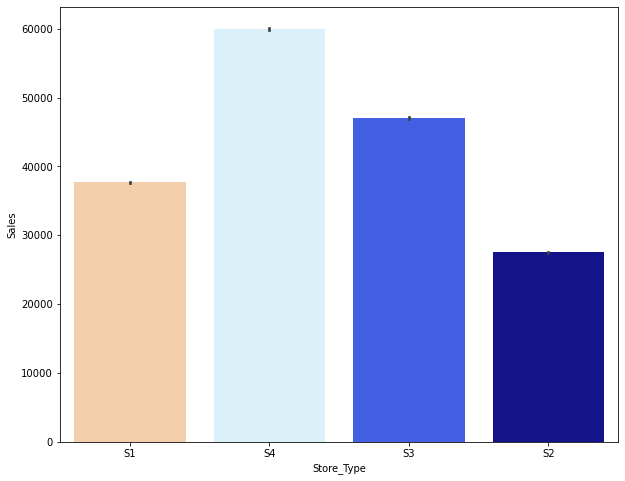

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Store_Type',data=data,palette='flag')

In [23]:
# S4 type of stores are doing highest number of sales followed by S3 S1 and S2 respectively.

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

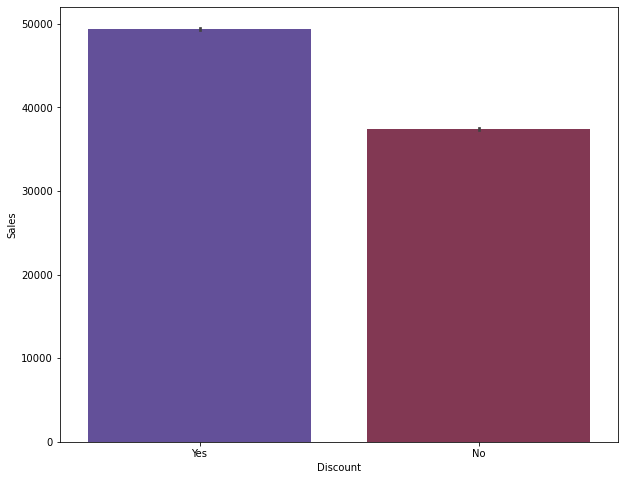

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Discount',data=data,palette='twilight')

In [25]:
#Stores offering discounts are selling more than stores offering no discounts. 

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

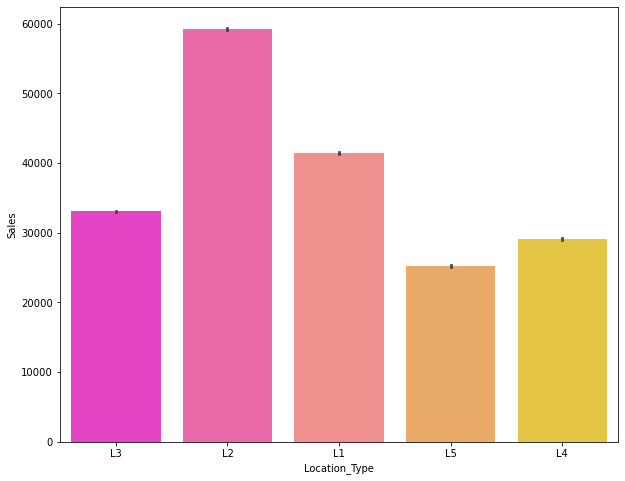

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Location_Type',data=data,palette='spring')

In [27]:
# L2>L1>L3>L4>l5 this is order of localities in terms of sales made in them.

<AxesSubplot:xlabel='Region_Code', ylabel='Sales'>

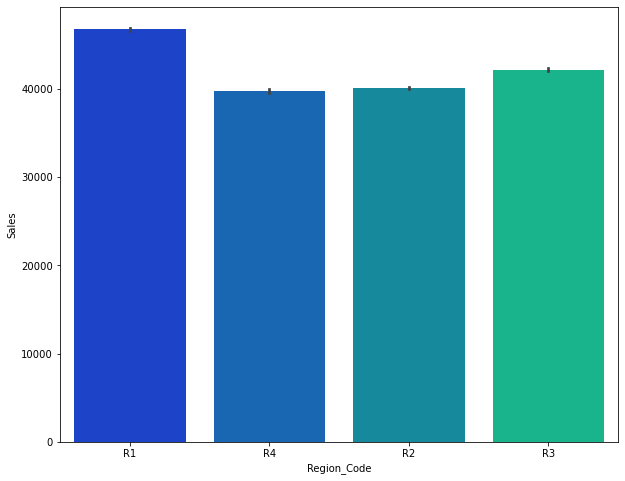

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(y='Sales',x='Region_Code',data=data,palette='winter')

In [29]:
#Sales done in region with region code 4 and 2 are almost same. however in R1 maximum sales is done. 

In [30]:
data.drop(axis=1, columns=['Date','#Order'],inplace=True) 

In [31]:
data["Sales"]= data.Sales.round(0).astype('int64') # converting dtpye from float to integer

In [32]:
# some more import.

In [33]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
var_mod = data.select_dtypes(include='object').columns
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
### converting categorical columns into numerical ones.    
    

In [35]:
data1=data.corr()
data1

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
Store_id,1.000000e+00,8.627203e-02,6.729649e-02,-1.252935e-01,-4.477583e-19,-0.000693,0.004377
Store_Type,8.627203e-02,1.000000e+00,-1.009121e-01,-2.438844e-01,5.584485e-17,0.002121,0.492471
Location_Type,6.729649e-02,-1.009121e-01,1.000000e+00,-7.198033e-02,-3.105675e-17,0.000419,-0.283771
Region_Code,-1.252935e-01,-2.438844e-01,-7.198033e-02,1.000000e+00,-4.138573e-17,0.000147,-0.121003
Holiday,-4.477583e-19,5.584485e-17,-3.105675e-17,-4.138573e-17,1.000000e+00,0.019545,-0.154779
Discount,-6.928774e-04,2.121497e-03,4.190224e-04,1.471481e-04,1.954527e-02,1.000000,0.323906
Sales,4.376629e-03,4.924706e-01,-2.837714e-01,-1.210026e-01,-1.547788e-01,0.323906,1.000000


In [36]:
#Preparing for modelling. First separate dataset into features and label.

In [37]:
x=data.drop(columns=['Sales'])
y=data.Sales  # columns in X will be our features set and y is our label column.

In [38]:
# importing all important libraries for training the model.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

In [40]:
from sklearn.metrics import mean_squared_log_error # evaluation metrics

In [41]:
# segrating features and label into training and validation datasets.

In [42]:
x_train,x_valid,y_train,y_valid= train_test_split(x,y,test_size=0.3,random_state=22)

In [43]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

msle_list=[]


In [44]:
from sklearn import metrics

In [45]:
for name in algos:
    model = name
    model.fit(x_train,y_train)
    y_pred = model.predict(x_valid)
    MSLE= metrics.mean_squared_log_error(y_valid,y_pred+100000)
    msle_list.append(MSLE)
   


In [46]:
# passed our dataset into all algorithms to get MSLE matrix for evaluation.

In [47]:
msle_list

[1.8665043585842915,
 1.8665053302302936,
 1.8665186391765411,
 1.8483356189566307,
 1.8462391890943142]

In [48]:
evaluation = pd.DataFrame({'Model': names,
                           'MSLE': msle_list})   ## preparing DF 

In [49]:
evaluation

,Model,MSLE
0,Linear Regression,1.866504
1,Ridge Regression,1.866505
2,Lasso Regression,1.866519
3,K Neighbors Regressor,1.848336
4,Decision Tree Regressor,1.846239


In [50]:
test_data= pd.read_csv('sales-prediction_test.csv')  # reading dataset availabel for making prediction

In [51]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [52]:
# preparing dataset for passing it into model.

In [53]:
test=test_data.drop(axis=1, columns=['ID','Date'])

In [54]:
test_1= pd.DataFrame(test)

In [55]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store_id       22265 non-null  int64 
 1   Store_Type     22265 non-null  object
 2   Location_Type  22265 non-null  object
 3   Region_Code    22265 non-null  object
 4   Holiday        22265 non-null  int64 
 5   Discount       22265 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [56]:
le = LabelEncoder()
var_mod = test_1.select_dtypes(include='object').columns
for i in var_mod:
    test_1[i] = le.fit_transform(test_1[i])

In [57]:
# let's pass the prepared dataset into the model and predict the sales for the given stores.

In [58]:
submission = pd.read_csv('my_submission.csv')
model =  DecisionTreeRegressor()
model.fit(x,y)
final_predictions = model.predict(test_1)
submission['Sales'] = final_predictions
submission.to_csv('my_submission_2.csv', index=False)